In [63]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
#Advance-style plotting
import seaborn as sns
color =sns.color_palette()
sns.set_style('darkgrid')

In [64]:
train=pd.read_excel('Data_train.xlsx')
test =pd.read_excel('Data_test.xlsx')

In [65]:
train.head(2)

,ID,Date,LicenseNo,FacilityID,FacilityName,Type,Street,City,State,LocationID,Reason,SectionViolations,RiskLevel,Geo_Loc,Inspection_Results
0,31103489027986,26-04-2010,4744,8123,7715,RESTAURANT,15522,id-11235901,id_1890134,81876.0,CANVASS,33.0,High,locid16406,4
1,10088999935915,21-06-2009,2973,12268,11664,GROCERY STORE,3057,id-11235901,id_1890134,81862.0,COMPLAINT,33.0,High,locid878,4


In [66]:
train['City'].unique()

array(['id-11235901', 'id-11275913'], dtype=object)

In [67]:
train.dtypes

ID                      int64
Date                   object
LicenseNo               int64
FacilityID              int64
FacilityName            int64
Type                   object
Street                  int64
City                   object
State                  object
LocationID            float64
Reason                 object
SectionViolations     float64
RiskLevel              object
Geo_Loc                object
Inspection_Results      int64
dtype: object

In [68]:
test.isnull().sum()

ID                       0
Date                     0
LicenseNo                0
FacilityID               0
FacilityName             0
Type                  1215
Street                   0
City                     0
State                    0
LocationID              15
Reason                   0
SectionViolations    12976
RiskLevel                0
Geo_Loc                  0
dtype: int64

In [69]:
temp_df = train.copy()
temp_df['Date'] = pd.to_datetime(temp_df['Date'], errors='coerce')

In [70]:
nat_indices = temp_df[temp_df['Date'].isna()].index

del temp_df

train.loc[nat_indices, 'Date'].unique()

array(['29-02-2011', '29-02-2015'], dtype=object)

In [71]:
# Replacing the above dates by valid date
train['Date'] = train['Date'].str.replace('29-02-2011', '28-02-2011')
train['Date'] = train['Date'].str.replace('29-02-2015', '28-02-2015')

train['Date'] = pd.to_datetime(train['Date'])

In [72]:
#Sorting the dataframe by Date for analysis
train = train.sort_values(by='Date')

train = train.reset_index(drop=True)

In [73]:
#Checking columns to drop
for col in train.columns:
    print(col, train[col].nunique())

ID 147443
Date 2506
LicenseNo 34384
FacilityID 25535
FacilityName 24348
Type 409
Street 17290
City 2
State 2
LocationID 104
Reason 17
SectionViolations 61
RiskLevel 4
Geo_Loc 16316
Inspection_Results 7


In [74]:
train = train.drop(columns=['ID'], errors='ignore')
test = test.drop(columns=['ID'], errors='ignore')

In [75]:
train.head()

,Date,LicenseNo,FacilityID,FacilityName,Type,Street,City,State,LocationID,Reason,SectionViolations,RiskLevel,Geo_Loc,Inspection_Results
0,2009-01-02,12039,1767,1591,RESTAURANT,10859,id-11235901,id_1890134,81864.0,LICENSE,38.0,High,locid1995,1
1,2009-01-02,33956,12013,11425,LIQUOR,7235,id-11235901,id_1890134,81902.0,CONSULTATION,33.0,Low,locid12088,5
2,2009-01-02,8682,14182,13501,RESTAURANT,4833,id-11235901,id_1890134,81861.0,CANVASS RE-INSPECTION,30.0,High,locid5609,4
3,2009-01-02,11939,217,202,GROCERY STORE,2598,id-11235901,id_1890134,81854.0,LICENSE RE-INSPECTION,NaN,Low,locid4081,4
4,2009-01-02,5149,5983,5722,RESTAURANT,8417,id-11235901,id_1890134,81847.0,CANVASS,35.0,High,locid7350,4


In [76]:
train['year'] =train.Date.dt.year
train['month'] = train.Date.dt.month
train["dayofweek"]=train.Date.dt.dayofweek
train["dayofyear"]=train.Date.dt.dayofyear
train["dayofmonth"]=train.Date.dt.day
train["week"]=train.Date.dt.week
train["hour"]=train.Date.dt.hour
train["minute"]=train.Date.dt.minute
train["is_weekend"]=train.Date.apply( lambda train : 1 if train  in [5,6] else 0 )
train["year"]=train.Date.dt.year
train["quarter"]=train.Date.dt.quarter
train["is_month_end"]=train.Date.dt.is_month_end
train["monis_month_startth"]=train.Date.dt.is_month_start
train["is_year_end"]=train.Date.dt.is_year_end
train["is_year_start"]=train.Date.dt.is_year_start

In [77]:
test['Date'] = test['Date'].str.replace('29-02-2011', '28-02-2011')
test['Date'] = test['Date'].str.replace('29-02-2015', '28-02-2015')

test['Date'] = pd.to_datetime(test['Date'])

In [78]:
test['year'] =test.Date.dt.year
test['month'] = test.Date.dt.month
test["dayofweek"]=test.Date.dt.dayofweek
test["dayofyear"]=test.Date.dt.dayofyear
test["dayofmonth"]=test.Date.dt.day
test["week"]=test.Date.dt.week
test["hour"]=test.Date.dt.hour
test["minute"]=test.Date.dt.minute
test["is_weekend"]=test.Date.apply( lambda test : 1 if test  in [5,6] else 0 )
test["year"]=test.Date.dt.year
test["quarter"]=test.Date.dt.quarter
test["is_month_end"]=test.Date.dt.is_month_end
test["monis_month_startth"]=test.Date.dt.is_month_start
test["is_year_end"]=test.Date.dt.is_year_end
test["is_year_start"]=test.Date.dt.is_year_start

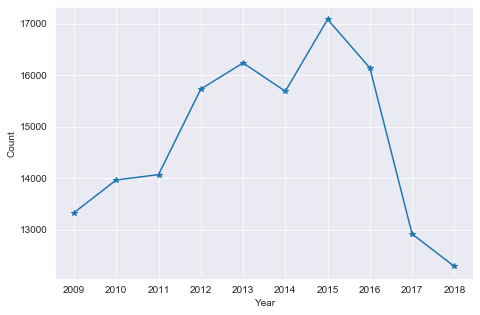

In [79]:
#analysizing data distribution
from matplotlib import pyplot as plt
year_count = train.groupby(['year'])['year'].count()
years = year_count.index
count_values = year_count.values

plt.rcParams['figure.figsize'] = [7.5, 5]
plt.plot(years, count_values, marker='*')
plt.xticks(years)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [80]:
train.fillna(-999, inplace =True)

In [81]:
test.fillna(-999, inplace =True)

In [82]:
test.shape

(49148, 27)

In [83]:
sample =pd.read_excel('Sample_Submission.xlsx');sample.head()

,FACILITY CHANGED,FAIL,FURTHER INSPECTION REQUIRED,INSPECTION OVERRULED,PASS,PASS(CONDITIONAL),SHUT-DOWN
0,0.000529,0.868388,0.001055,0.006834,0.010680,0.111109,0.001407
1,0.000410,0.012149,0.000548,0.001388,0.977625,0.007183,0.000696
2,0.001143,0.026652,0.005940,0.427783,0.088497,0.010358,0.439627
3,0.001715,0.045655,0.007711,0.113533,0.279784,0.018539,0.533062
4,0.000437,0.013916,0.000597,0.001822,0.970593,0.011864,0.000771


In [84]:
train.head()

,Date,LicenseNo,FacilityID,FacilityName,Type,Street,City,State,LocationID,Reason,...,dayofmonth,week,hour,minute,is_weekend,quarter,is_month_end,monis_month_startth,is_year_end,is_year_start
0,2009-01-02,12039,1767,1591,RESTAURANT,10859,id-11235901,id_1890134,81864.0,LICENSE,...,2,1,0,0,0,1,False,False,False,False
1,2009-01-02,33956,12013,11425,LIQUOR,7235,id-11235901,id_1890134,81902.0,CONSULTATION,...,2,1,0,0,0,1,False,False,False,False
2,2009-01-02,8682,14182,13501,RESTAURANT,4833,id-11235901,id_1890134,81861.0,CANVASS RE-INSPECTION,...,2,1,0,0,0,1,False,False,False,False
3,2009-01-02,11939,217,202,GROCERY STORE,2598,id-11235901,id_1890134,81854.0,LICENSE RE-INSPECTION,...,2,1,0,0,0,1,False,False,False,False
4,2009-01-02,5149,5983,5722,RESTAURANT,8417,id-11235901,id_1890134,81847.0,CANVASS,...,2,1,0,0,0,1,False,False,False,False


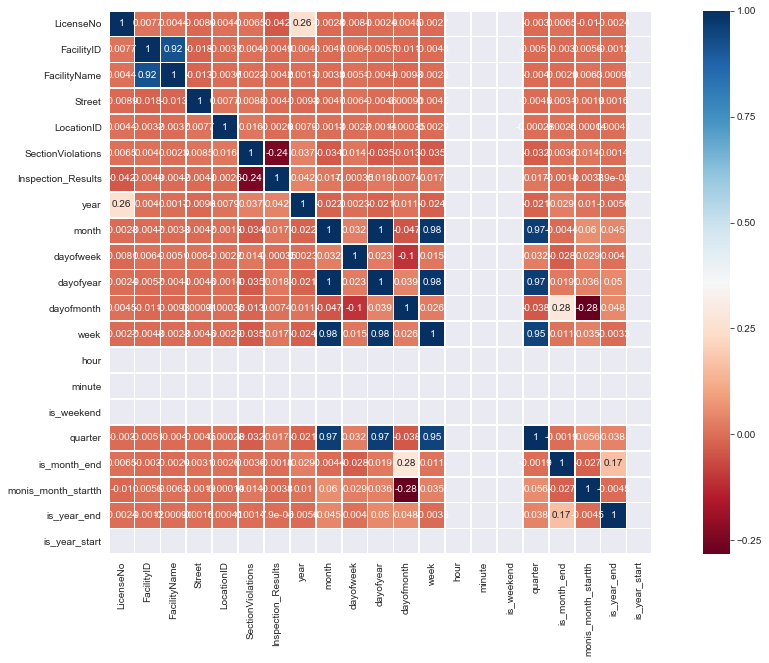

In [85]:
import seaborn as sns
corrmat =train.corr()
f, ax = plt.subplots(figsize=(18,10))
sns.heatmap(corrmat, square=True, annot=True, linewidth=0.8, cmap='RdBu')

In [24]:
train['Inspection_Results'].unique()

array([1, 5, 4, 6, 0, 3, 2], dtype=int64)

In [27]:
test.drop(['hour', 'minute', 'is_weekend'], axis=1, inplace =True)

In [29]:
x =train.drop(['Date','Inspection_Results'], axis =1)
y =train['Inspection_Results']

In [30]:
test =test.drop('Date', axis =1)

In [31]:
from catboost import Pool, CatBoostClassifier, cv

In [32]:
cate_features_index=np.where(x.dtypes != float) [0]; cate_features_index

array([ 0,  1,  2,  3,  4,  5,  6,  8, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,log_loss
errcb=[]
y_pred_totcb=[]

from sklearn.model_selection import KFold,StratifiedKFold, TimeSeriesSplit, GroupKFold
fold=KFold(n_splits=3, shuffle=True,random_state=99)
i=1

for train_index, test_index in fold.split(x,y):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index] #6 depth 0.1 and -1 no dropinng

    m=CatBoostClassifier(iterations =600,learning_rate=0.2, depth=8,random_state=299,thread_count=6, loss_function='MultiClass',random_strength=0.1,leaf_estimation_method='Newton', use_best_model=True)
    m.fit(X_train,y_train,cate_features_index,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=100,verbose=100)
    preds=m.predict_proba(X_test)
    
    print("err: ",log_loss(y_test,preds))
    errcb.append(log_loss(y_test,preds))
    p = m.predict_proba(test)
    y_pred_totcb.append(p)

0:	learn: 1.1886607	test: 1.1852361	test1: 1.1871897	best: 1.1871897 (0)	total: 3.84s	remaining: 38m 19s
100:	learn: 0.2984479	test: 0.2450945	test1: 0.3177042	best: 0.3174072 (70)	total: 7m 56s	remaining: 39m 12s
200:	learn: 0.2732481	test: 0.2161769	test1: 0.3095316	best: 0.3095252 (199)	total: 16m 18s	remaining: 32m 22s
300:	learn: 0.2574895	test: 0.1995839	test1: 0.3066344	best: 0.3066024 (298)	total: 24m 53s	remaining: 24m 43s
400:	learn: 0.2400823	test: 0.1923565	test1: 0.3051993	best: 0.3051515 (394)	total: 33m 41s	remaining: 16m 43s
500:	learn: 0.2242204	test: 0.1886956	test1: 0.3046841	best: 0.3046592 (499)	total: 42m 27s	remaining: 8m 23s
599:	learn: 0.2097987	test: 0.1867734	test1: 0.3047602	best: 0.3042317 (565)	total: 51m 24s	remaining: 0us

bestTest = 0.3042316606
bestIteration = 565

Shrink model to first 566 iterations.
err:  0.3042316606002379
0:	learn: 1.1912910	test: 1.1884880	test1: 1.1889697	best: 1.1889697 (0)	total: 3.67s	remaining: 36m 40s
100:	learn: 0.2929947	

In [51]:
predsx =np.mean(y_pred_totcb,0)

In [52]:
predsx

array([[1.36697324e-06, 9.67398240e-01, 1.19866811e-04, ...,
        3.94546692e-03, 2.62328222e-02, 4.23004110e-04],
       [3.69471170e-07, 2.48097548e-03, 1.54009717e-05, ...,
        9.96089412e-01, 1.36575158e-03, 2.52638109e-05],
       [4.06693100e-04, 6.39722881e-03, 1.63620674e-03, ...,
        8.16312341e-02, 2.12427725e-03, 3.21918766e-01],
       ...,
       [5.63003426e-07, 1.13859101e-03, 2.42972528e-05, ...,
        9.94692500e-01, 2.17665357e-03, 4.50820541e-05],
       [8.17071993e-07, 1.10879224e-01, 1.06000081e-05, ...,
        7.59982099e-03, 8.80853417e-01, 4.81125692e-05],
       [9.48643399e-06, 1.21210961e-03, 2.66325902e-04, ...,
        9.94785537e-01, 1.82834866e-03, 5.16003214e-04]])

In [53]:
np.mean(errcb)

0.30522790461910015

In [54]:
colx =sample.columns

In [55]:
colx

Index(['FACILITY CHANGED', 'FAIL', 'FURTHER INSPECTION REQUIRED',
       'INSPECTION OVERRULED', 'PASS', 'PASS(CONDITIONAL)', 'SHUT-DOWN'],
      dtype='object')

In [58]:
predsx

array([[1.36697324e-06, 9.67398240e-01, 1.19866811e-04, ...,
        3.94546692e-03, 2.62328222e-02, 4.23004110e-04],
       [3.69471170e-07, 2.48097548e-03, 1.54009717e-05, ...,
        9.96089412e-01, 1.36575158e-03, 2.52638109e-05],
       [4.06693100e-04, 6.39722881e-03, 1.63620674e-03, ...,
        8.16312341e-02, 2.12427725e-03, 3.21918766e-01],
       ...,
       [5.63003426e-07, 1.13859101e-03, 2.42972528e-05, ...,
        9.94692500e-01, 2.17665357e-03, 4.50820541e-05],
       [8.17071993e-07, 1.10879224e-01, 1.06000081e-05, ...,
        7.59982099e-03, 8.80853417e-01, 4.81125692e-05],
       [9.48643399e-06, 1.21210961e-03, 2.66325902e-04, ...,
        9.94785537e-01, 1.82834866e-03, 5.16003214e-04]])

In [ ]:
pd =pd.DataFrame(predsx, columns=colx)
pd.head()

In [40]:
pd.to_excel('eng4xx.xlsx', index=False)